1-50        4911
51-100      1236
101-200     2573
201-300     1877
301-400     1320
401-500     1063
501-600      734
601-700      535
701-800      485
801-900      429
901-1000     198
1000-        268
Name: range, dtype: int64


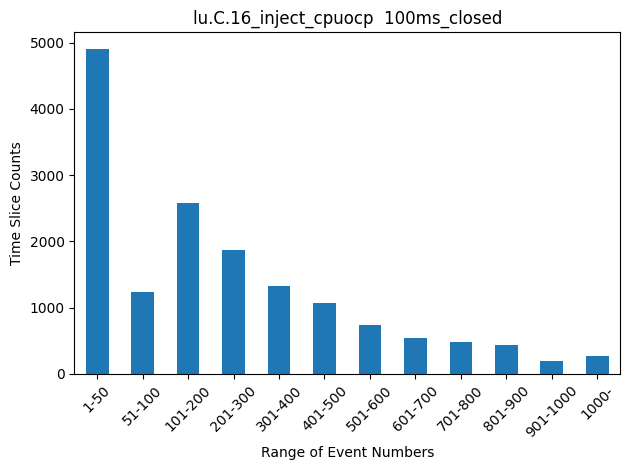

In [5]:
import pandas as pd

process = "lu.C.16_inject_cpuocp"
duration = "100ms_closed"

input_path ="/home/sx/MPI_profile/"+ process + "/" + duration + "/graph_feature_merged.csv"

df = pd.read_csv(input_path, header=0)
# print(len(df))
df['counts'] = df['name'].str.count('_')
# print(counts_df)
# bins = [0,  50,  100, 150, 200, 250, 300, float('inf')]
bins = [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
# labels = ['1-50', '51-100',  '100-150', '151-200', '201-250', '251-300', '301-']
labels = ['1-50', '51-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-800', '801-900', '901-1000', '1000-']

df['range'] = pd.cut(df['counts'], bins=bins, labels=labels, right=False)

distribution = df['range'].value_counts().sort_index()

print(distribution)

import matplotlib.pyplot as plt

distribution.plot(kind='bar')
plt.xticks(range(len(distribution.index)), distribution.index)

plt.xlabel('Range of Event Numbers')
plt.ylabel('Time Slice Counts')
plt.title(process + "  " + duration)
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()